# Creating cost functions

In [1]:
from qiskit.circuit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from random import randrange
from numpy import pi
from project.unified_noise_model.Unified_Noise_Model import Unified_Noise_Model

from project.unified_noise_model.Unified_Noise_Model import Unified_Noise_Model
from qiskit.circuit.library import XGate

from scipy.optimize import minimize

### First cost function

   Create a cost function for $Q$ number of qubits. The circuit of the cost function must be $I$ iterations of pairs of $rz$ gates. That means, if $I=3$, there sould be $2*3=6$ $rz$ gates per qubit. It also need a noise model as parameter. This noise model will affect the result of running the $rz$'s circuit. The cost is calculated as the sum of each qubit average result. Considering that we run the circuit $10000$, if we measure $6000$ times $0$ an the other $4000$ we measure $1$ in the first qubit, this qubit will have an average value of $0.6$. We repeat this process for each of the rest qubits and calculate the sum. The cost will be value between $0$ and $Q$

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['rz']
  All-qubits errors: ['rz']


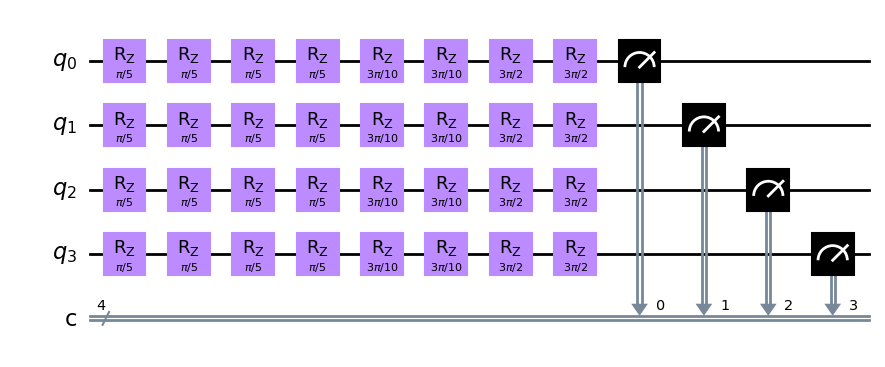

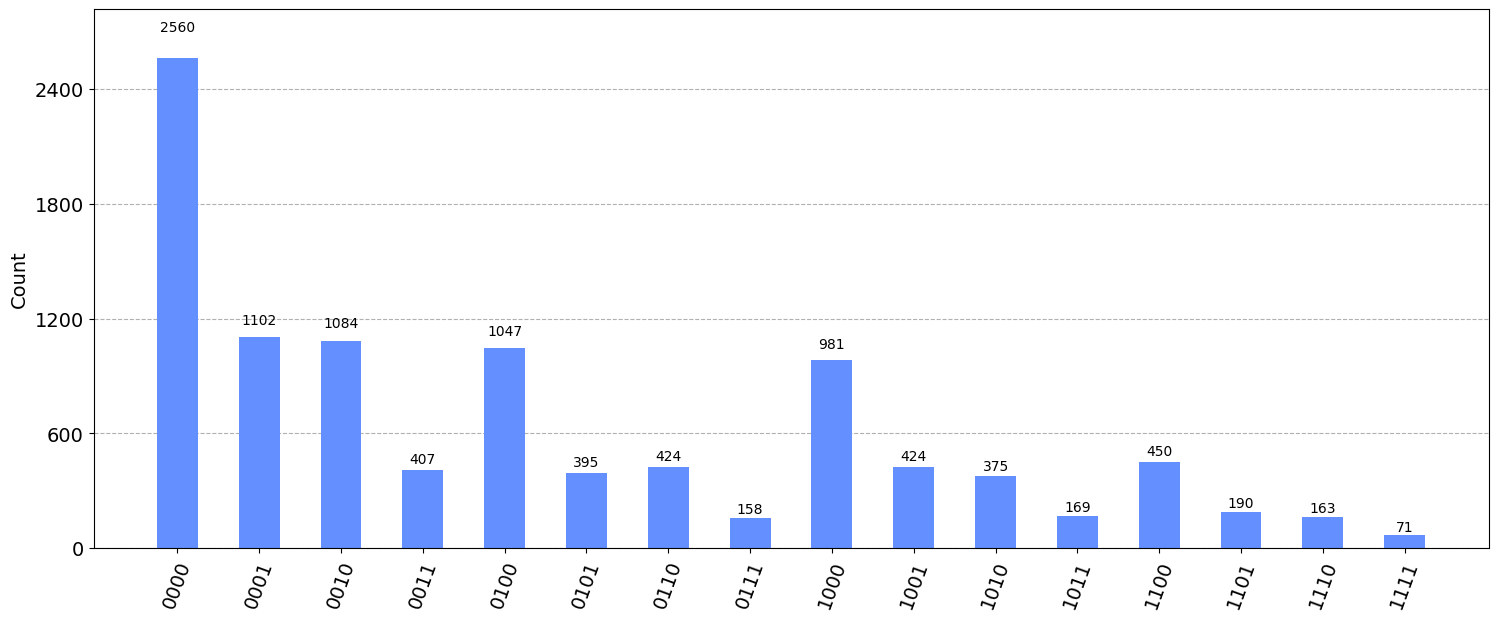

qubit  0  average: 0.2823 

qubit  1  average: 0.2898 

qubit  2  average: 0.2851 

qubit  3  average: 0.2916 

cost: 1.1488 



In [3]:
def cost_func(num_qubits,num_iterations,noise_model):
    qc = QuantumCircuit(num_qubits,num_qubits)
    shots=10000
    
    #Add random phi cz gates
    for itr in range(num_iterations):
        random_phi = randrange(0,20,step=1)
        random_phi = random_phi / 10
        for q in range(num_qubits):
            qc.rz(random_phi * pi,q)
            qc.rz(random_phi * pi,q)
            
    qc.measure(range(num_qubits),range(num_qubits))
    display(qc.draw('mpl'))
    
    #Run the circuit 10000 times and store the results
    simulator = AerSimulator(noise_model=noise_model)
    result = simulator.run(qc,shots=shots).result()
    counts = result.get_counts(0)
    display(plot_histogram(counts,figsize=[18,7]))

    #Calculate the average for result of each qubit, and finally sum each of the averages to get the COST.
    cost = 0
    for qubit in range(num_qubits):
        qubit_average = 0
        for string in counts.keys():
            current_qubit_in_current_string = string[qubit]
            if current_qubit_in_current_string == '1':
                qubit_average += counts[string]
        qubit_average = qubit_average / shots
        print('qubit ',qubit,' average:',qubit_average,'\n')
        cost += qubit_average
    return cost
                
unm = Unified_Noise_Model()
#noise model with 0.2 of depolarization prob
unm.add_depolarizing_channel(0.1,['rz'],[])
print(unm.noise_model)

#cost function with 5 qubits and 4 iterations
cost = cost_func(4,4,unm.noise_model) 
print('cost:',cost,'\n')


### Second cost function

Given a cost function with a fixed...
* amount of rz pairs iterations
* noise level
* amount of qubits

...find the rz rotations that minimize the cost. 

* First of all, do it just with depolarizing noise. 

In [4]:
def cost_func2(rotations,num_qubits,num_iterations,noise_model):
    qc = QuantumCircuit(num_qubits,num_qubits)
    shots=10000
    
    #Add random phi cz gates
    for itr in range(num_iterations):
        for q in range(num_qubits):
            qc.rz(rotations[itr],q)
            qc.rz(rotations[itr],q)
            
    qc.measure(range(num_qubits),range(num_qubits))
    display(qc.draw('mpl'))
    
    #Run the circuit 10000 times and store the results
    simulator = AerSimulator(noise_model=noise_model)
    result = simulator.run(qc,shots=shots).result()
    counts = result.get_counts(0)
    #display(plot_histogram(counts,figsize=[18,7]))

    #Calculate the average for result of each qubit, and finally sum each of the averages to get the COST.
    cost = 0
    for qubit in range(num_qubits):
        qubit_average = 0
        for string in counts.keys():
            current_qubit_in_current_string = string[qubit]
            if current_qubit_in_current_string == '1':
                qubit_average += counts[string]
        qubit_average = qubit_average / shots
        #print('qubit ',qubit,' average:',qubit_average,'\n')
        cost += qubit_average
    cost = cost
    #print('cost ',cost)
    #print('---------------------------------------------')
    costs.append(cost)
    return cost

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['rz']
  All-qubits errors: ['rz']
angles: [5.969026041820607, 3.455751918948773, 4.084070449666731, 2.827433388230814]


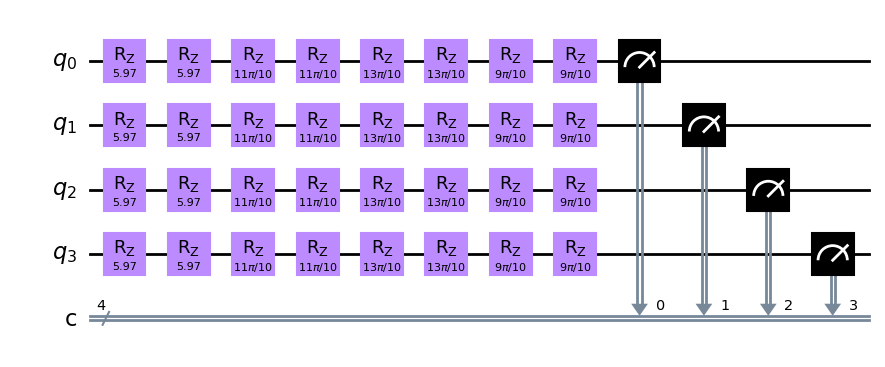

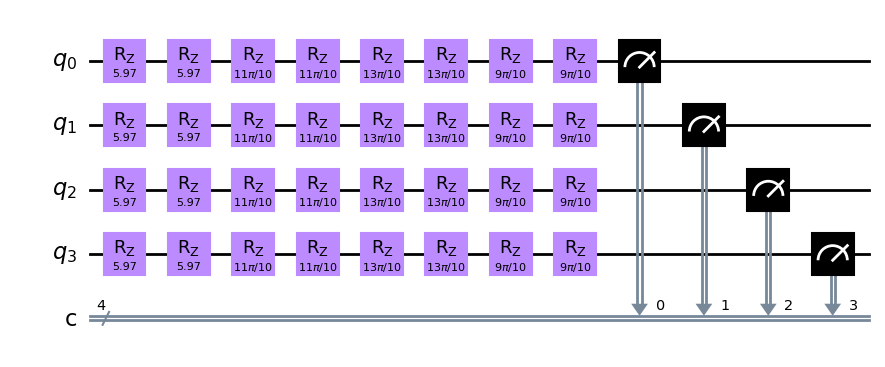

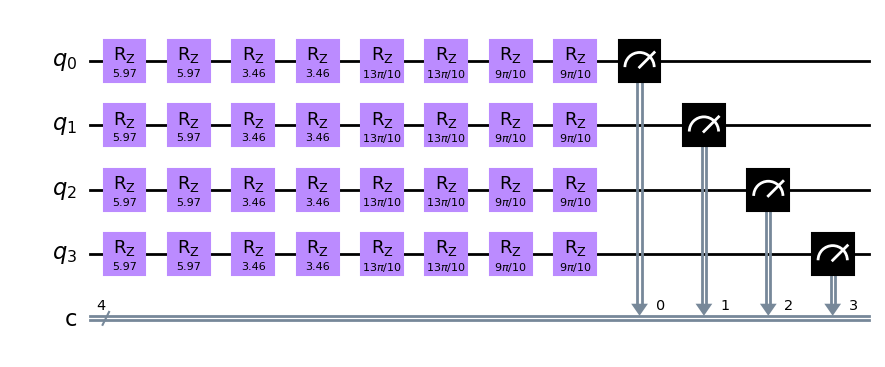

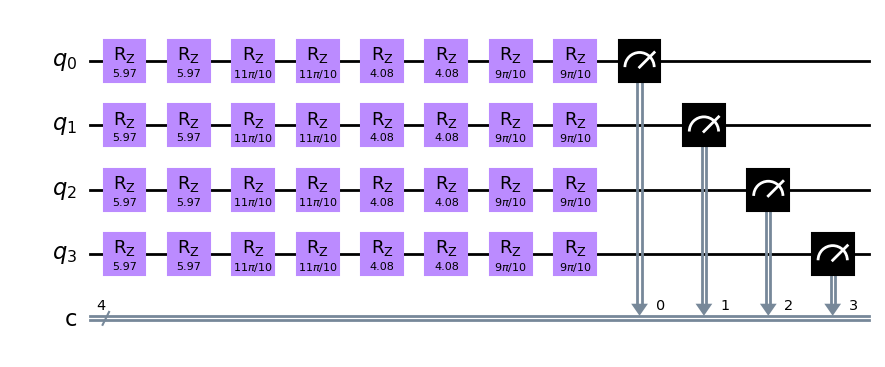

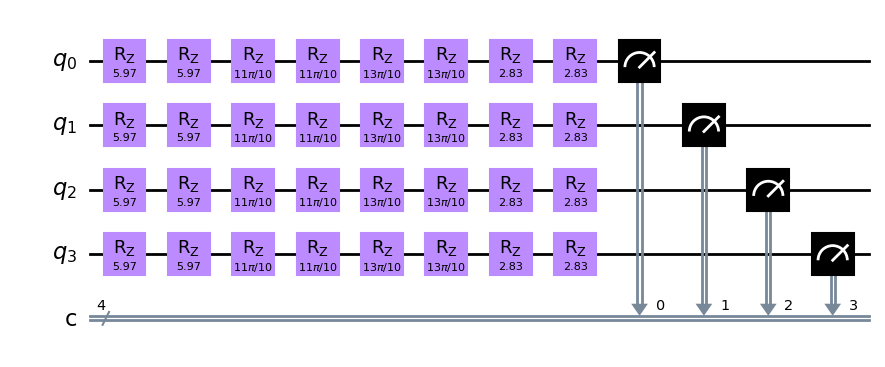

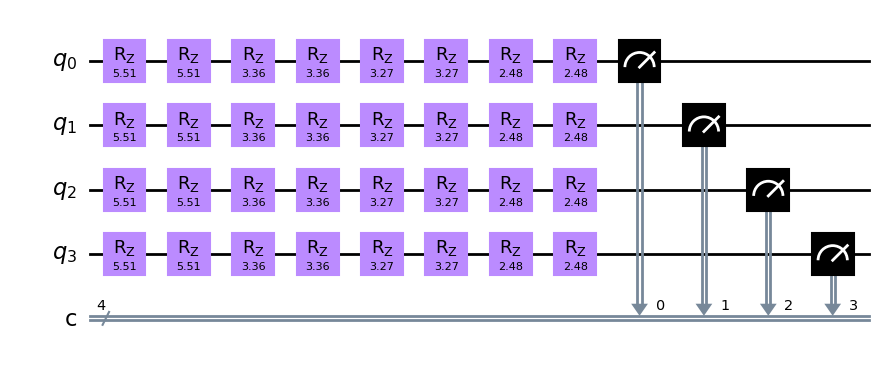

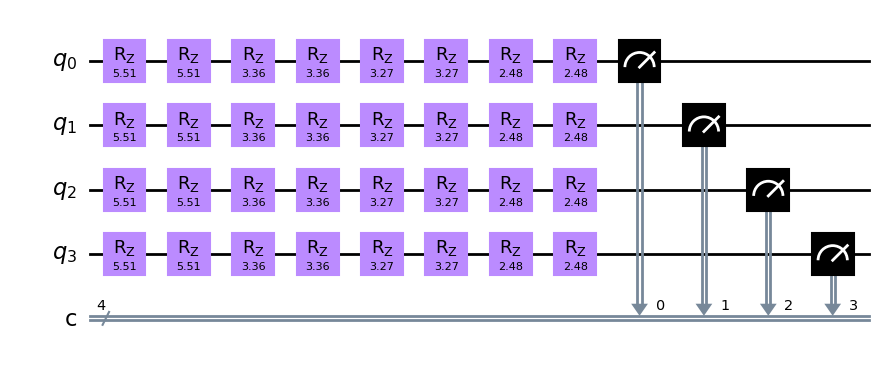

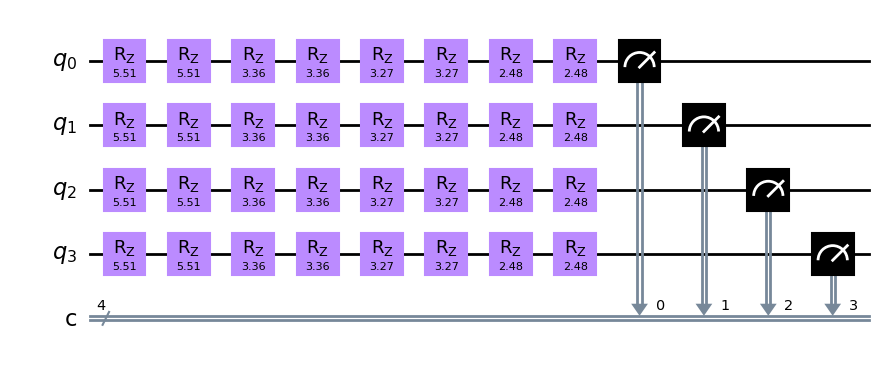

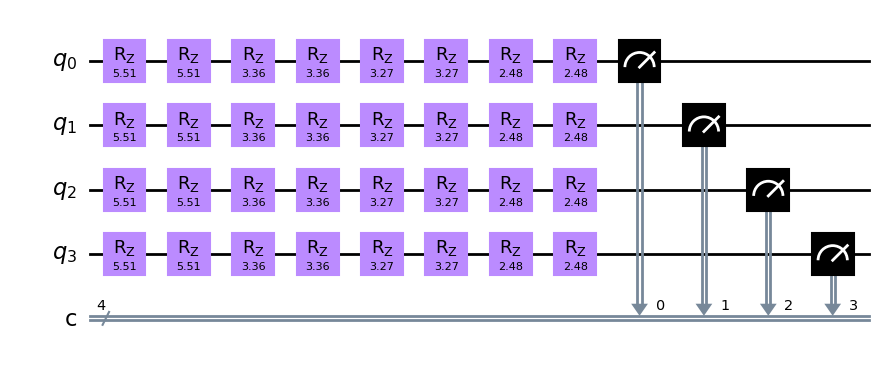

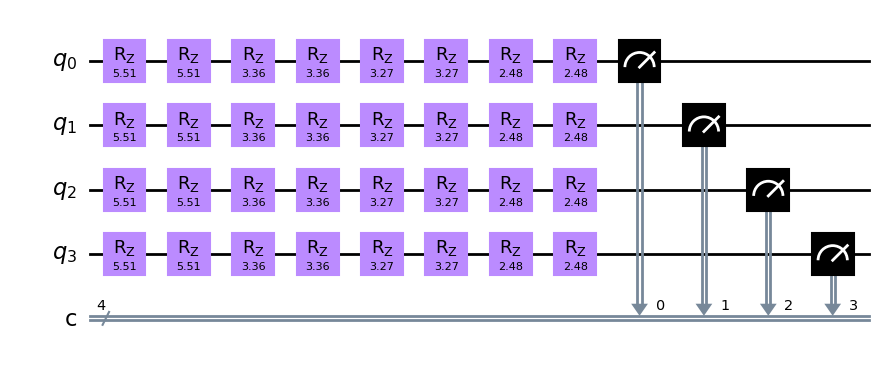

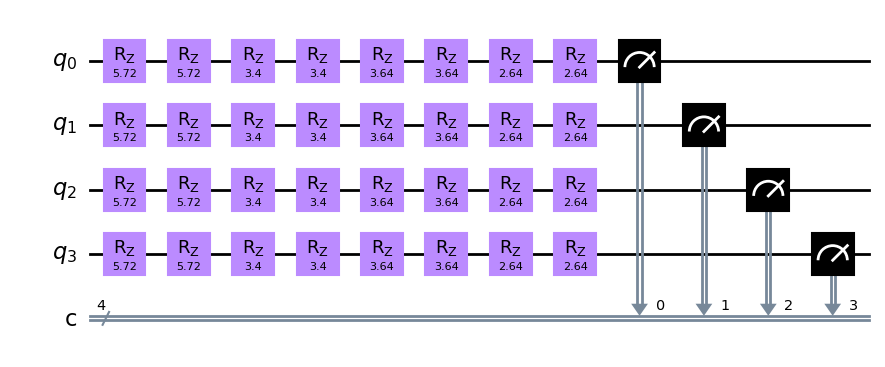

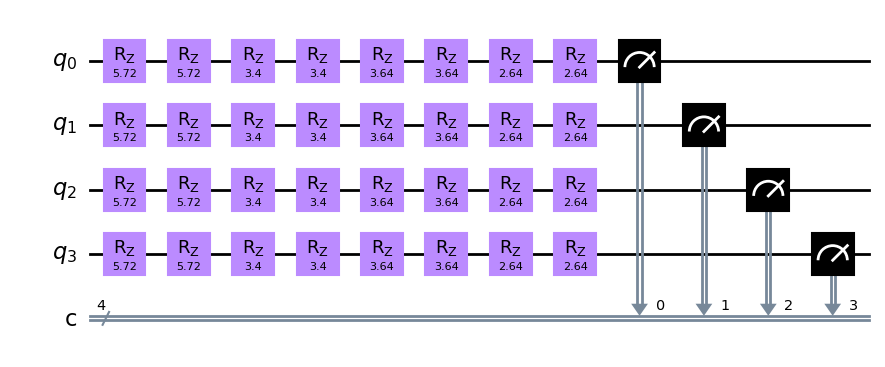

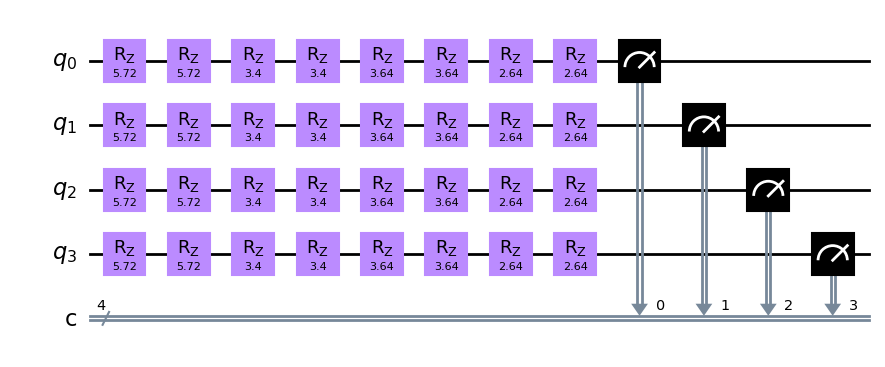

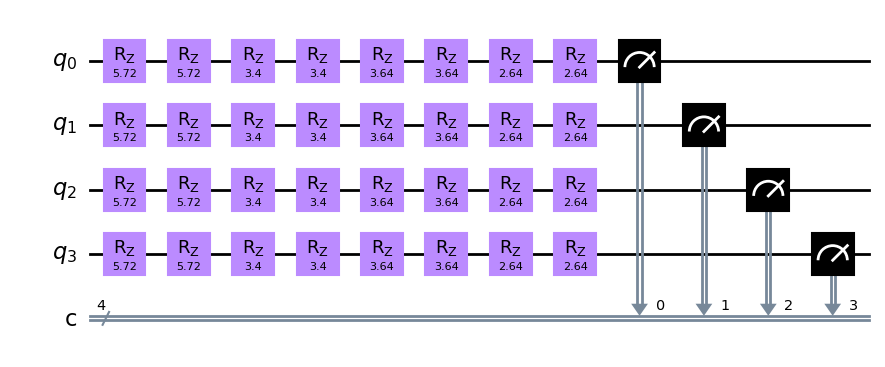

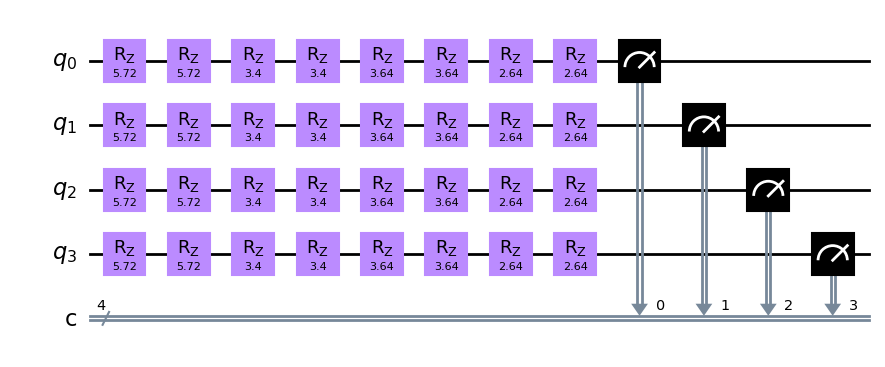

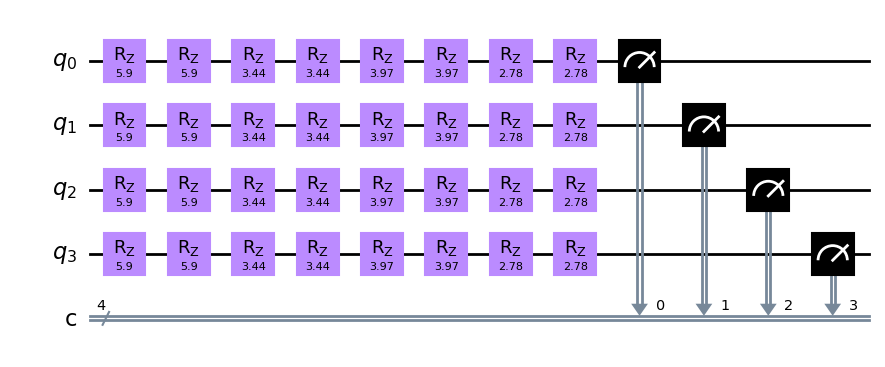

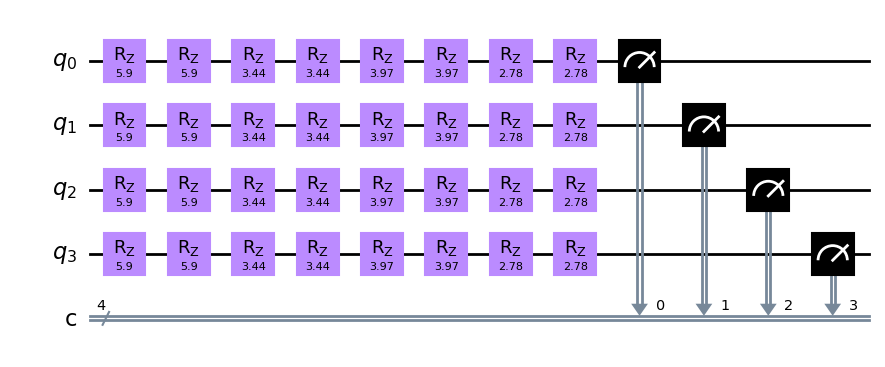

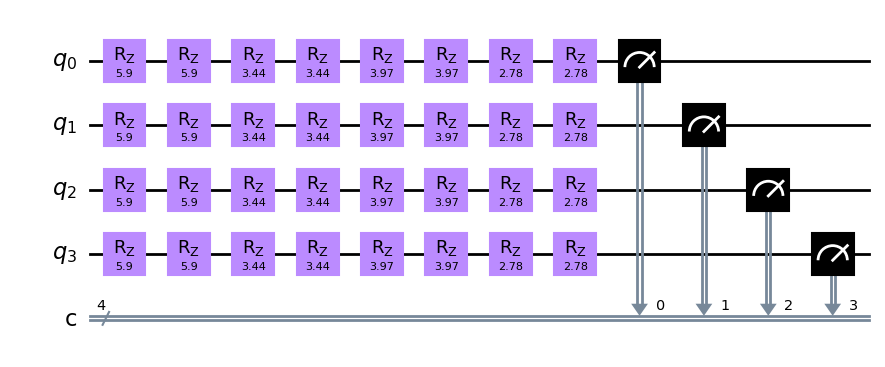

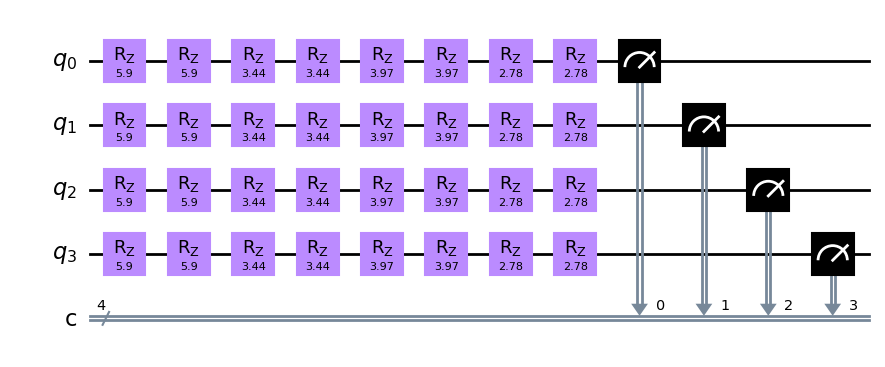

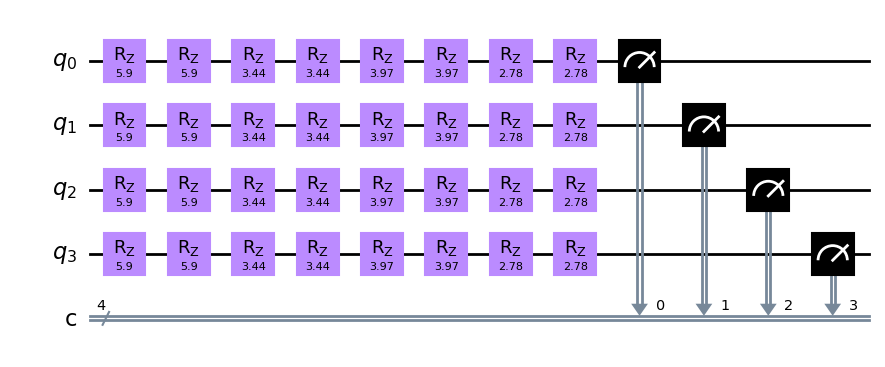

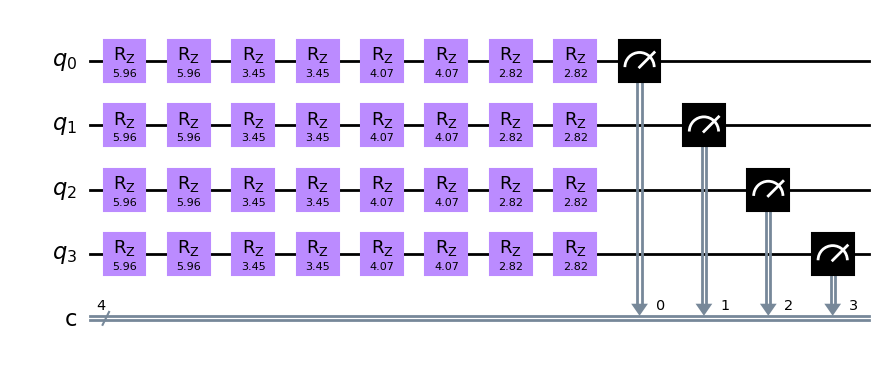

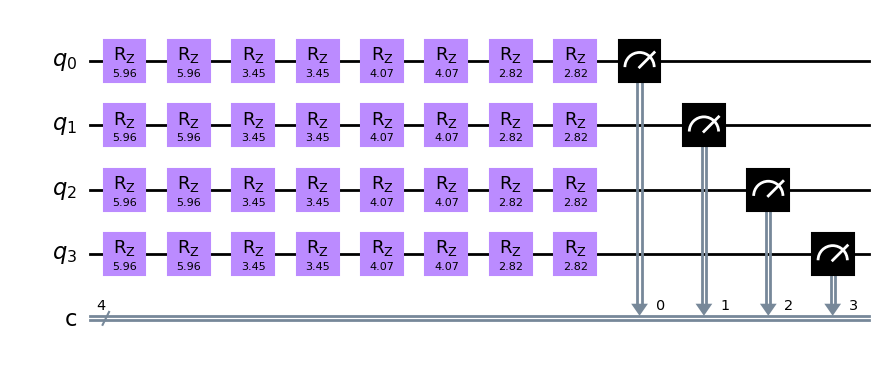

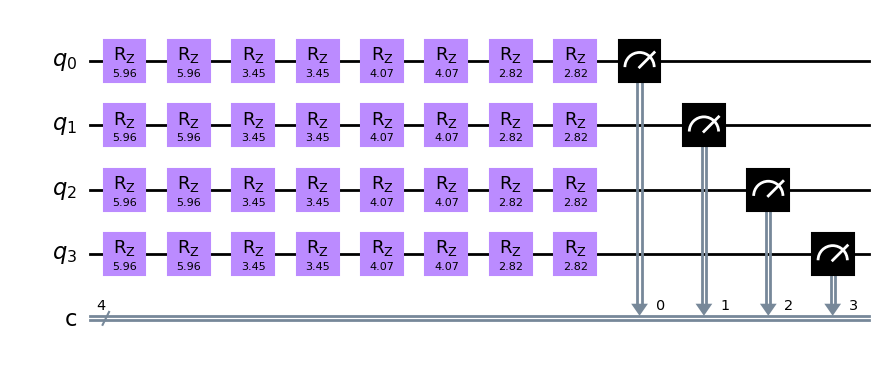

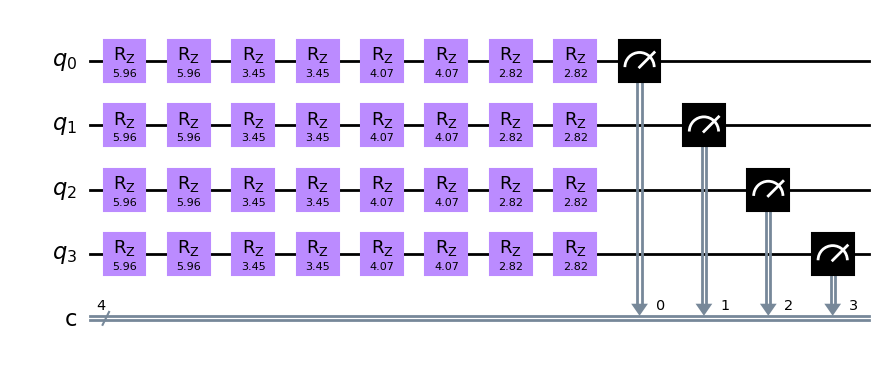

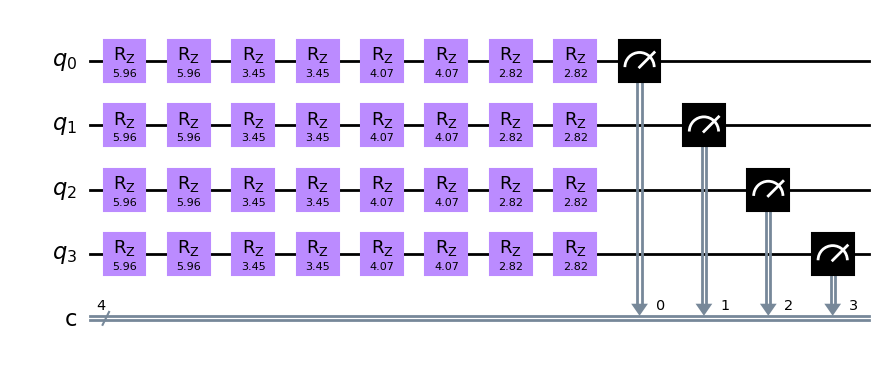

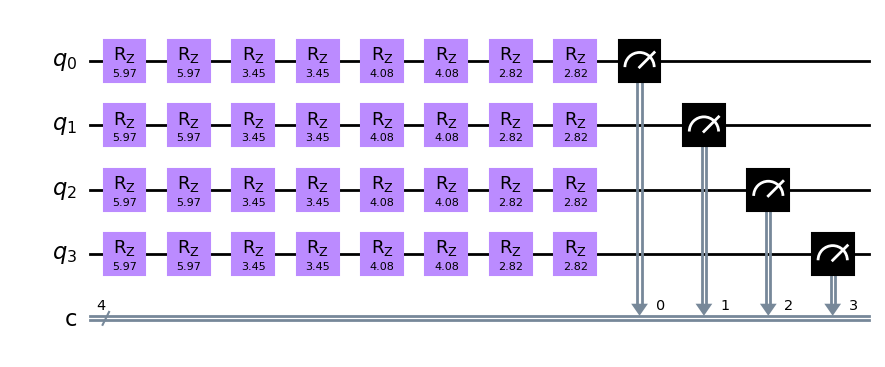

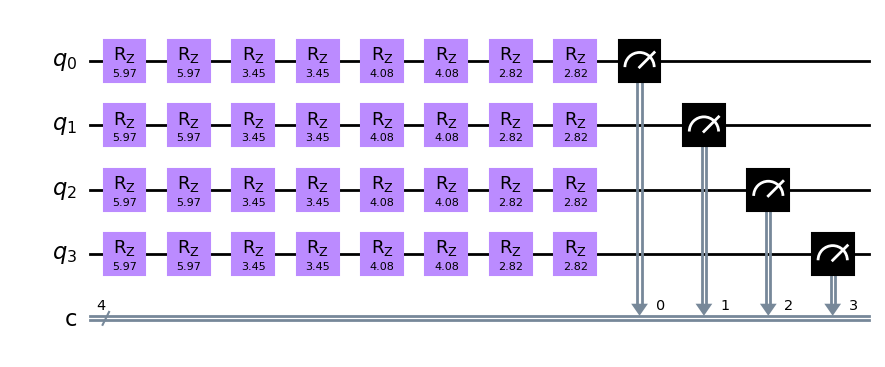

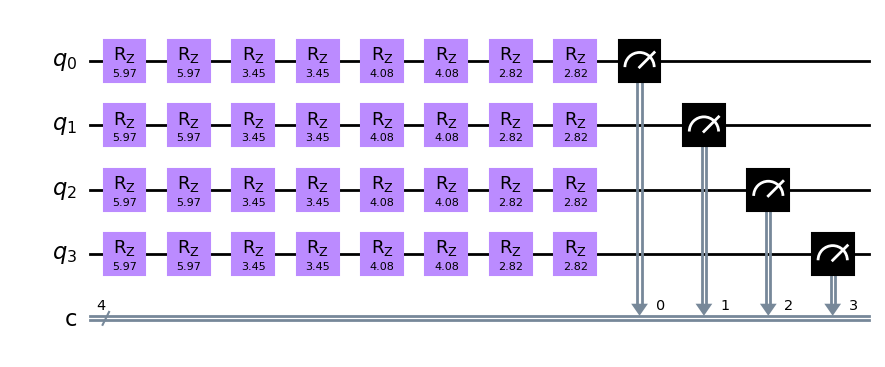

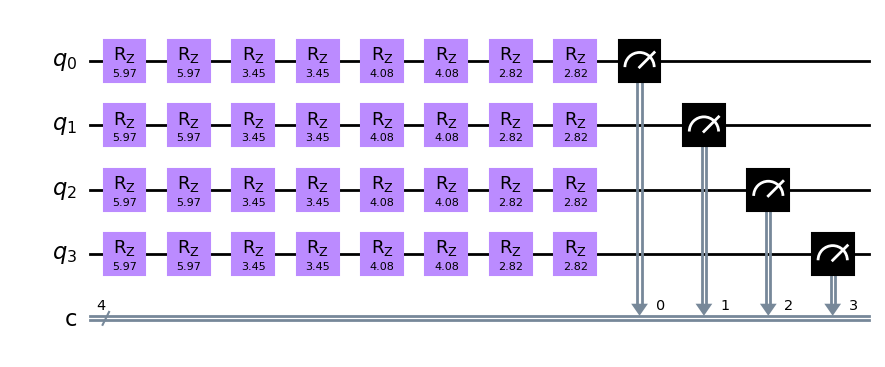

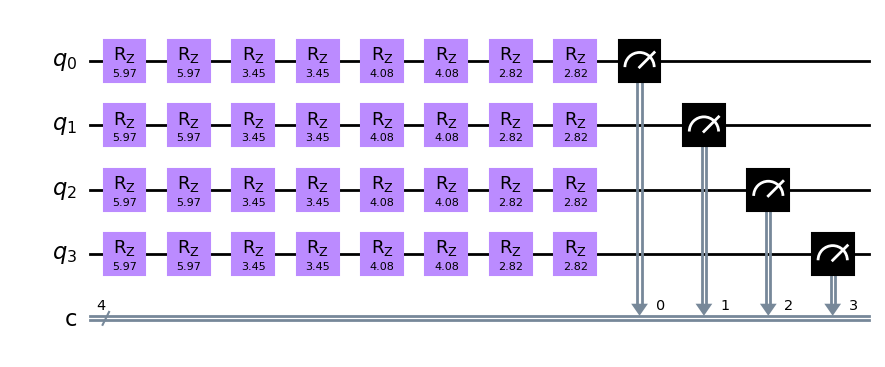

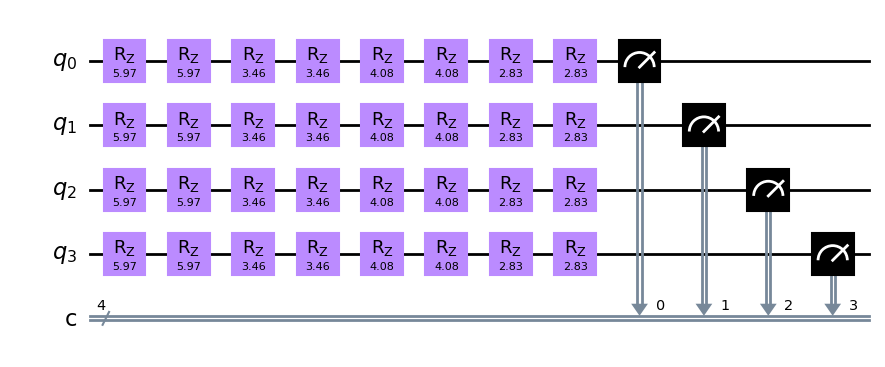

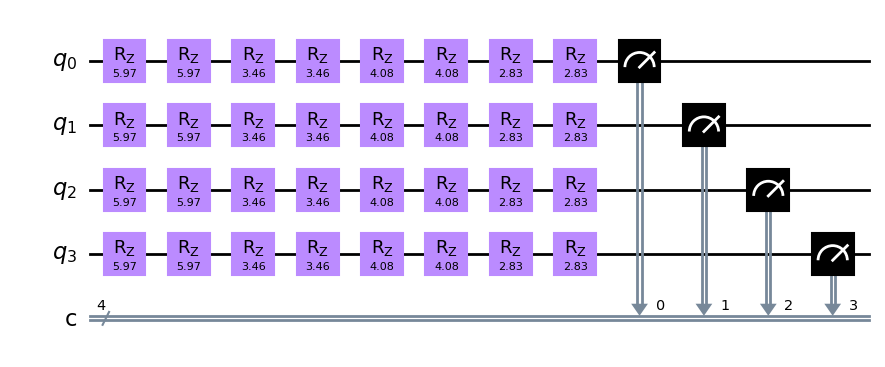

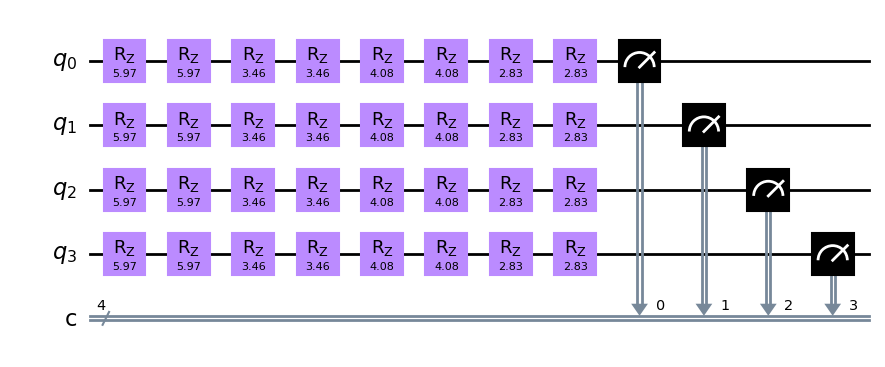

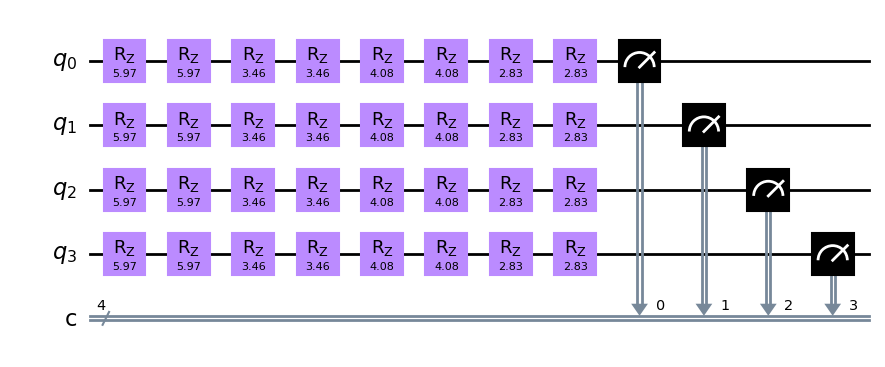

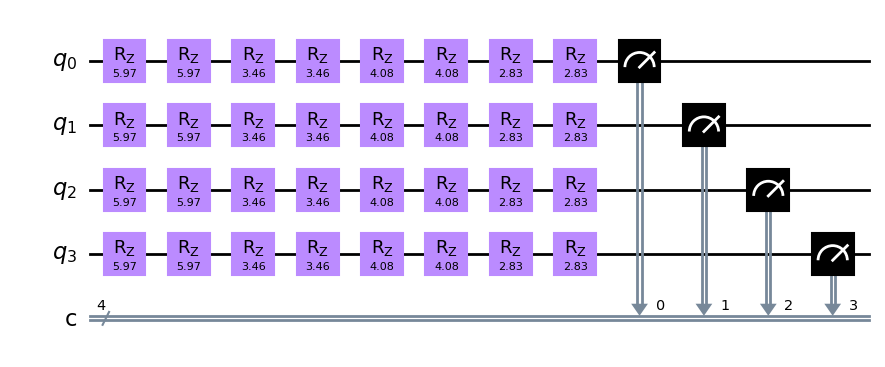

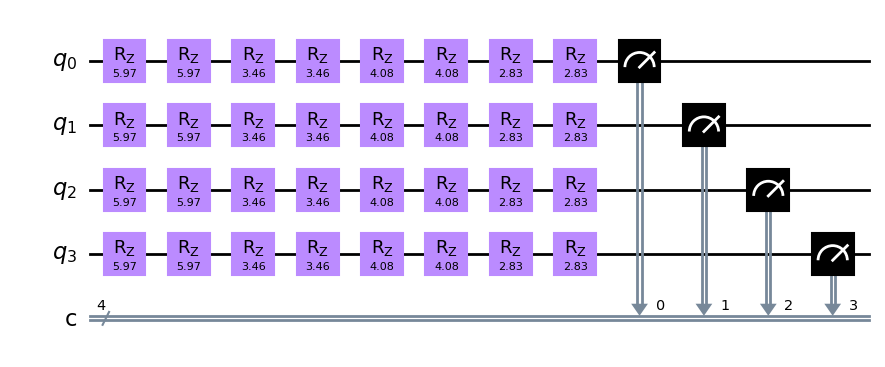

KeyboardInterrupt: 

In [5]:
from scipy.optimize import minimize
costs = []

# setting up the fixed parameters
depol_noise_prob = 0.5
num_iterations = 4
num_qubits = 4

#noise model
unm = Unified_Noise_Model()
unm.add_depolarizing_channel(depol_noise_prob,['rz'],[])
print(unm.noise_model)

#cost function

#There are the multipl
angles = []
for i in range(num_iterations):
    random_phi = randrange(0,20,step=1)
    random_phi = random_phi / 10
    angles.append(random_phi * pi)

print('angles:', angles)

result = minimize(
fun=cost_func2,
x0=angles,
args=(num_qubits,num_iterations,unm.noise_model),
method='L-BFGS-B',
)

print('result: ',result)
print('checking minimized parameters:')
cost = cost_func2(result.x,num_qubits,num_iterations,unm.noise_model)
print(cost)

Text(0, 0.5, 'cost')

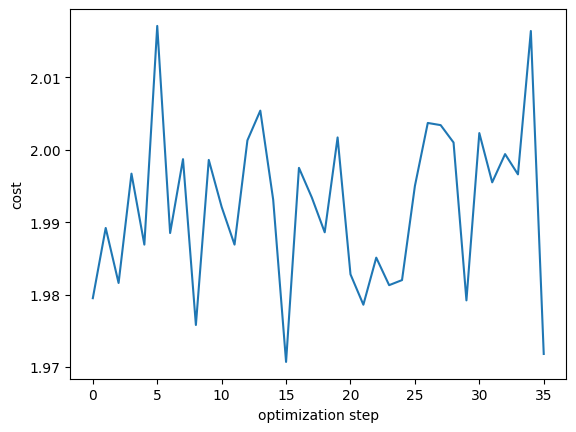

In [6]:
import matplotlib.pyplot as plt

#print(costs)
plt.plot(range(len(costs)),costs, label='Cost Function')
plt.xlabel('optimization step')
plt.ylabel('cost')

* Second, try varying the depolarizing noise level and compare the minimized parameters.


In [ ]:

all_costs = []
all_min_costs = []

# setting up the fixed parameters
depol_noise_prob = 0.5
num_iterations = 4
num_qubits = 4

#noise model
unm = Unified_Noise_Model()
unm.add_depolarizing_channel(depol_noise_prob,['rz'],[])
print(unm.noise_model)

#Setting up the random angles to optimize
angles = []
for i in range(num_iterations):
    random_phi = randrange(0,20,step=1)
    random_phi = random_phi / 10
    angles.append(random_phi * pi)
print('angles:', angles)

#Repeat the optimization for different noise level
for prob in range(0,55,5):
    print('---------------------------------------------')
    print('--------------------error prob ',prob/100,'--------------------')
    print('---------------------------------------------')
    
    #defining local iteration variables
    costs = []
    depol_noise_prob = prob / 100

    #noise model
    unm = Unified_Noise_Model()
    unm.add_depolarizing_channel(depol_noise_prob,['rz'],[])
    print(unm.noise_model)

    #cost function
    result = minimize(
    fun=cost_func2,
    x0=angles,
    args=(num_qubits,num_iterations,unm.noise_model),
    method='L-BFGS-B',
    )
    print('result: ',result)
    
    print('checking minimized parameters:')
    min_cost = cost_func2(result.x,num_qubits,num_iterations,unm.noise_model)
    print(min_cost)
    
    #saving the costs of this sumulation
    all_costs.append(costs)
    
    all_min_costs.append(min_cost)

In [ ]:
#print(all_min_costs)
plt.xlabel('depolarizing error probability')
plt.ylabel('cost')
plt.plot([0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5],all_min_costs, label='Cost Function')


* Finally, try it with the complete UNM model

In [ ]:
costs=[]

depol_noise_prob = 0.2
stateprep_noise_prob = 0
measurement_error_prob = 0
num_iterations = 1
num_qubits = 4


unm = Unified_Noise_Model()
x_StatePreparation = XGate(label='x_StatePreparation')
'''
unm.add_relaxation_dephasing_channel(
qubits=range(num_qubits),
qubits_T1=[0.4,0.4,0.4,0.4],
qubits_T2=[0.4,0.4,0.4,0.4],
one_qubit_gates=['rz'],
one_qubit_gates_times=[[0],[0],[0],[0]],
two_qubits_gates=[],
two_qubits_gates_times=[]
)
'''

#Cause there is no state preparation, this part of SPAM channel will not affect
unm.add_all_noise_channels(
state_preparation_error_prob=stateprep_noise_prob,
measurement_error_prob=measurement_error_prob,
state_preparation_error_gate=x_StatePreparation,
depolarizing_prob=depol_noise_prob,
one_qubit_gates=['rz'],
one_qubit_gates_times=[[0],[0],[0],[0]],
two_qubits_gates=[],
two_qubits_gates_times=[],
qubits=range(num_qubits),
qubits_T1=[0.1,0.1,0.1,0.1],
qubits_T2=[0.1,0.1,0.1,0.1]
)



#Setting up the random angles to optimize
angles = []
for i in range(num_iterations):
    random_phi = randrange(0,20,step=1)
    random_phi = random_phi / 10
    angles.append(random_phi * pi)
print('angles:', angles)

cost_func(num_qubits,num_iterations,unm.noise_model)

'''result = minimize(
    fun=cost_func2,
    x0=angles,
    args=(num_qubits,num_iterations,unm.noise_model),
    method='L-BFGS-B',
    )'''
print(result)

In [ ]:
import matplotlib.pyplot as plt

#print(costs)
plt.plot(range(len(costs)),costs, label='Cost Function')
plt.xlabel('optimization step')
plt.ylabel('cost')

## Third cost function

In [2]:
from qiskit_experiments.library.tomography import StateTomography
from qiskit import transpile

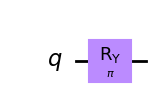

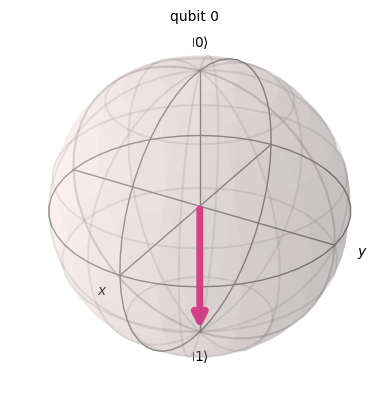

In [129]:
qc = QuantumCircuit(1)
qc.ry(pi,0)
a = qc
#a = transpile(qc,basis_gates=['cx','rz','sx','i'])
display(a.draw('mpl'))
display(Statevector(a).draw('bloch'))

_____________________________________________________________________________________-
FUNCTION DEBUG
_____________________________________________________________________________________-
current optimized_operation_params:  [0, 0.5, 0]
noise model: None
target circuit:


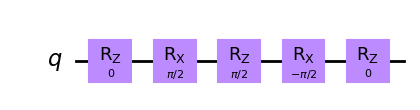

optimized circuit:


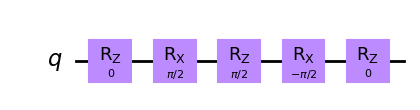

----------------------------------------------------------------------------------------
target operation:


<IPython.core.display.Latex object>

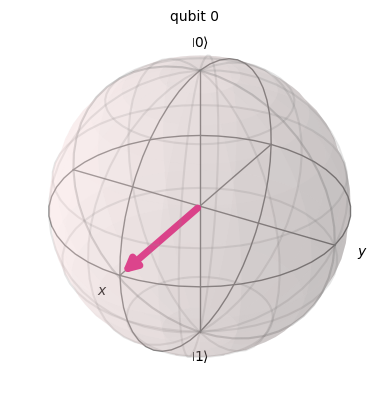

optimized operation:


<IPython.core.display.Latex object>

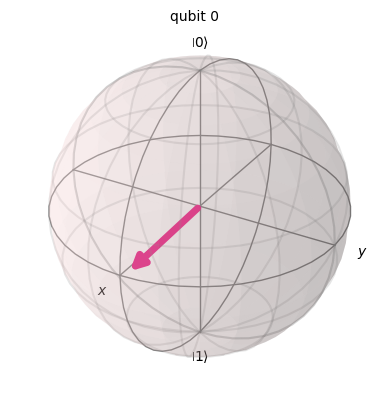

----------------------------------------------------------------------------------------
purity of  of optimized operation: 1.0000000000000009
state fidelity: 0.9989258195557013
cost: 0.0010741804442987446


0.0010741804442987446

In [3]:
from qiskit.quantum_info import Statevector,DensityMatrix
from qiskit.quantum_info import state_fidelity,purity
from qiskit.circuit.library import HGate
from math import trunc

# PREGUNTAR: Al qc_target no deberia agregarle ruido cuantico, ya que deberia ser la sitaucion IDEAL con la cual comparto.
# Entonces, a la hora de correr esto en un QPU real, solo qc_optimized deberia ser corrido ahi. qc_target deberia seguir
# siendo utilizado en un simulador? ya que necesito el estado ideal para la comparacion.


def cost_func3(optimized_operation_params,target_operation_params,inital_state_params,noise_model=None,debug=False):
    # quantum circuit to apply the target operation and the optimized operation
    qc_target = QuantumCircuit(1)
    qc_optimized = QuantumCircuit(1)
    
    
    # get the amount of gates for the operations
    gate_num = len(target_operation_params) // 3

    
    #apply the target operation and the optimized operation
    for gate in range(gate_num):
            # apply one of the target gate
            qc_target.rz(target_operation_params[gate*3]*pi,0)
            qc_target.rx(pi/2,0)
            qc_target.rz(target_operation_params[gate*3 + 1]*pi,0)
            qc_target.rx(-pi/2,0)
            qc_target.rz(target_operation_params[gate*3 + 2]*pi,0)

            # apply one of the optimized gate
            qc_optimized.rz(optimized_operation_params[gate*3]*pi,0)
            qc_optimized.rx(pi/2,0)
            qc_optimized.rz(optimized_operation_params[gate*3 + 1]*pi,0)
            qc_optimized.rx(-pi/2,0)
            qc_optimized.rz(optimized_operation_params[gate*3 + 2]*pi,0)
    if debug:
        print('_____________________________________________________________________________________-')
        print('FUNCTION DEBUG')
        print('_____________________________________________________________________________________-')

        print('current optimized_operation_params: ',optimized_operation_params)
        print('noise model:',noise_model)
        
        print('target circuit:')
        display(qc_target.draw('mpl'))
        print('optimized circuit:')
        display(qc_optimized.draw('mpl'))
        print('----------------------------------------------------------------------------------------')
        
    # get statevector of quantum circuit after applying target operation
    target_statevector = DensityMatrix.from_instruction(qc_target)
    if debug:
        print('target operation:')
        display(target_statevector.draw('latex'))
        display(target_statevector.draw('bloch'))
    
    
    # get statevector of quantum circuit after applying optimized operation
    simulator = AerSimulator(noise_model=noise_model)
    
    optimized_tomography = StateTomography(qc_optimized)
    optimized_tomography_data = optimized_tomography.run(simulator,seed_simulation=100).block_for_results()    
    optimized_statevector=optimized_tomography_data.analysis_results('state').value
    #.to_statevector()
    
    if debug:
        print('optimized operation:')
        display(optimized_statevector.draw('latex'))
        display(optimized_statevector.draw('bloch'))
        print('----------------------------------------------------------------------------------------')
    
    cost = 1 - state_fidelity(target_statevector, optimized_statevector)
    if debug:
        print('purity of  of optimized operation:',purity(optimized_statevector).real)
        print('state fidelity:',state_fidelity(target_statevector, optimized_statevector))
        print('cost:',cost)
    return cost

    
cost_func3([0,1/2,0],[0,1/2,0],[],debug=True)

In [8]:
costs=[]

depol_noise_prob = 0.3
stateprep_noise_prob = 0
measurement_error_prob = 0.3
num_qubits = 4
num_gates_to_optimize = 20

unm = Unified_Noise_Model()
x_StatePreparation = XGate(label='x_StatePreparation')


#Cause there is no state preparation, this part of SPAM channel will not affect
unm.add_all_noise_channels(
state_preparation_error_prob=stateprep_noise_prob,
measurement_error_prob=measurement_error_prob,
state_preparation_error_gate=x_StatePreparation,
depolarizing_prob=depol_noise_prob,
one_qubit_gates=['rz'],
one_qubit_gates_times=[[0],[0],[0],[0]],
two_qubits_gates=[],
two_qubits_gates_times=[],
qubits=range(num_qubits),
qubits_T1=[0.1,0.1,0.1,0.1],
qubits_T2=[0.1,0.1,0.1,0.1]
)

#Setting up the angles of the decomposed gates
#for our first trial, we will just give angles for U(-pi/2,pi/2,0)
target_operation_params = []
for i in range(num_gates_to_optimize):
    target_operation_params.append(-1/2)
    target_operation_params.append(1/2)
    target_operation_params.append(0)

#Setting up the random angles to optimize
optimized_operation_params = []
for i in range(num_gates_to_optimize):
    optimized_operation_params.append(-1/2)
    optimized_operation_params.append(1/2)
    optimized_operation_params.append(0)
        
print('optimized operation params:', optimized_operation_params)
print('target operation params:',target_operation_params)

result = minimize(
fun=cost_func3,
x0=optimized_operation_params,
args=(target_operation_params,[],unm.noise_model,False)
,method='L-BFGS-B',
tol=1e-7,
options={"maxiter": 30})

optimized operation params: [-0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0]
target operation params: [-0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0, -0.5, 0.5, 0]


In [9]:
result.x

array([-4.99999987e-01,  4.99999997e-01,  5.45217074e-09, -4.99999984e-01,
        5.00000004e-01,  2.56558833e-09, -4.99999992e-01,  5.00000015e-01,
        1.02631086e-08, -4.99999998e-01,  4.99999996e-01, -2.82803242e-09,
       -4.99999979e-01,  5.00000020e-01,  2.19818702e-08, -4.99999999e-01,
        5.00000002e-01, -1.44628331e-08, -4.99999977e-01,  4.99999984e-01,
        1.36855731e-08, -4.99999986e-01,  4.99999981e-01,  1.41210021e-09,
       -5.00000005e-01,  5.00000012e-01, -6.30933883e-09, -4.99999982e-01,
        5.00000000e-01, -8.64182047e-10, -4.99999980e-01,  5.00000012e-01,
       -8.39560830e-09, -5.00000009e-01,  5.00000005e-01,  1.50347038e-08,
       -4.99999992e-01,  5.00000014e-01,  1.56638307e-08, -5.00000016e-01,
        5.00000007e-01,  1.01843870e-08, -4.99999994e-01,  4.99999999e-01,
        1.77306034e-08, -4.99999985e-01,  5.00000028e-01, -8.96228214e-09,
       -5.00000004e-01,  5.00000005e-01,  1.49910749e-08, -4.99999993e-01,
        5.00000009e-01,  

_____________________________________________________________________________________-
FUNCTION DEBUG
_____________________________________________________________________________________-
current optimized_operation_params:  [-4.99999987e-01  4.99999997e-01  5.45217074e-09 -4.99999984e-01
  5.00000004e-01  2.56558833e-09 -4.99999992e-01  5.00000015e-01
  1.02631086e-08 -4.99999998e-01  4.99999996e-01 -2.82803242e-09
 -4.99999979e-01  5.00000020e-01  2.19818702e-08 -4.99999999e-01
  5.00000002e-01 -1.44628331e-08 -4.99999977e-01  4.99999984e-01
  1.36855731e-08 -4.99999986e-01  4.99999981e-01  1.41210021e-09
 -5.00000005e-01  5.00000012e-01 -6.30933883e-09 -4.99999982e-01
  5.00000000e-01 -8.64182047e-10 -4.99999980e-01  5.00000012e-01
 -8.39560830e-09 -5.00000009e-01  5.00000005e-01  1.50347038e-08
 -4.99999992e-01  5.00000014e-01  1.56638307e-08 -5.00000016e-01
  5.00000007e-01  1.01843870e-08 -4.99999994e-01  4.99999999e-01
  1.77306034e-08 -4.99999985e-01  5.00000028e-01 -8.9622821

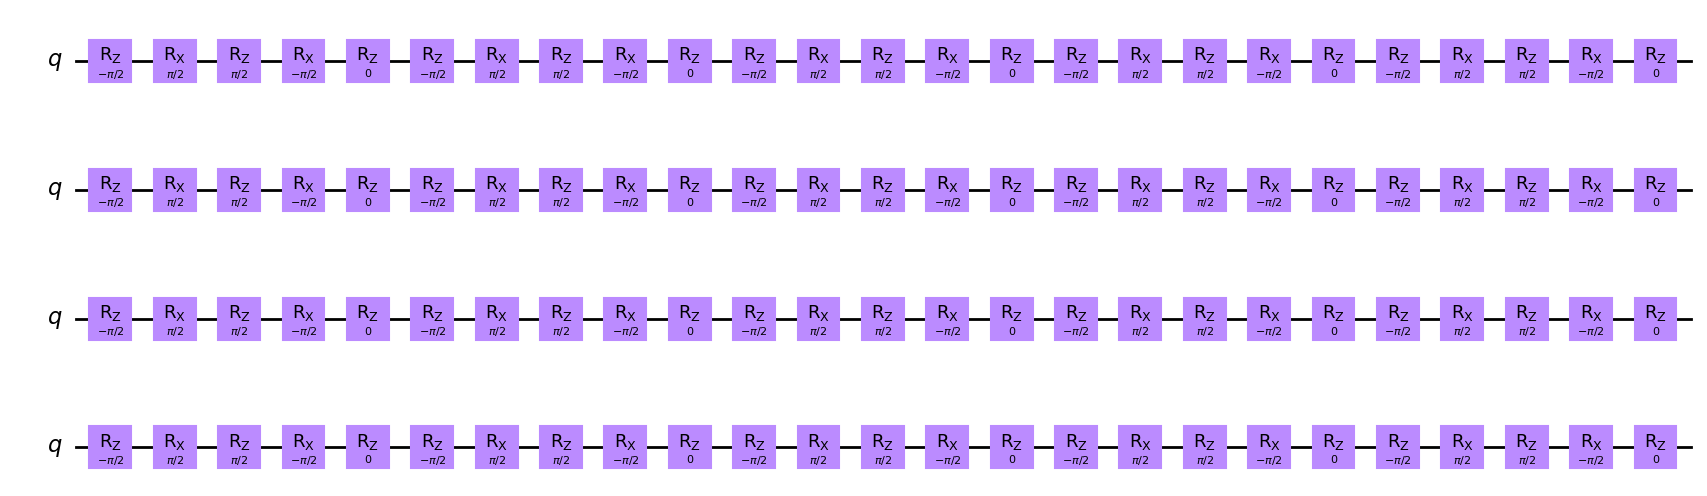

optimized circuit:


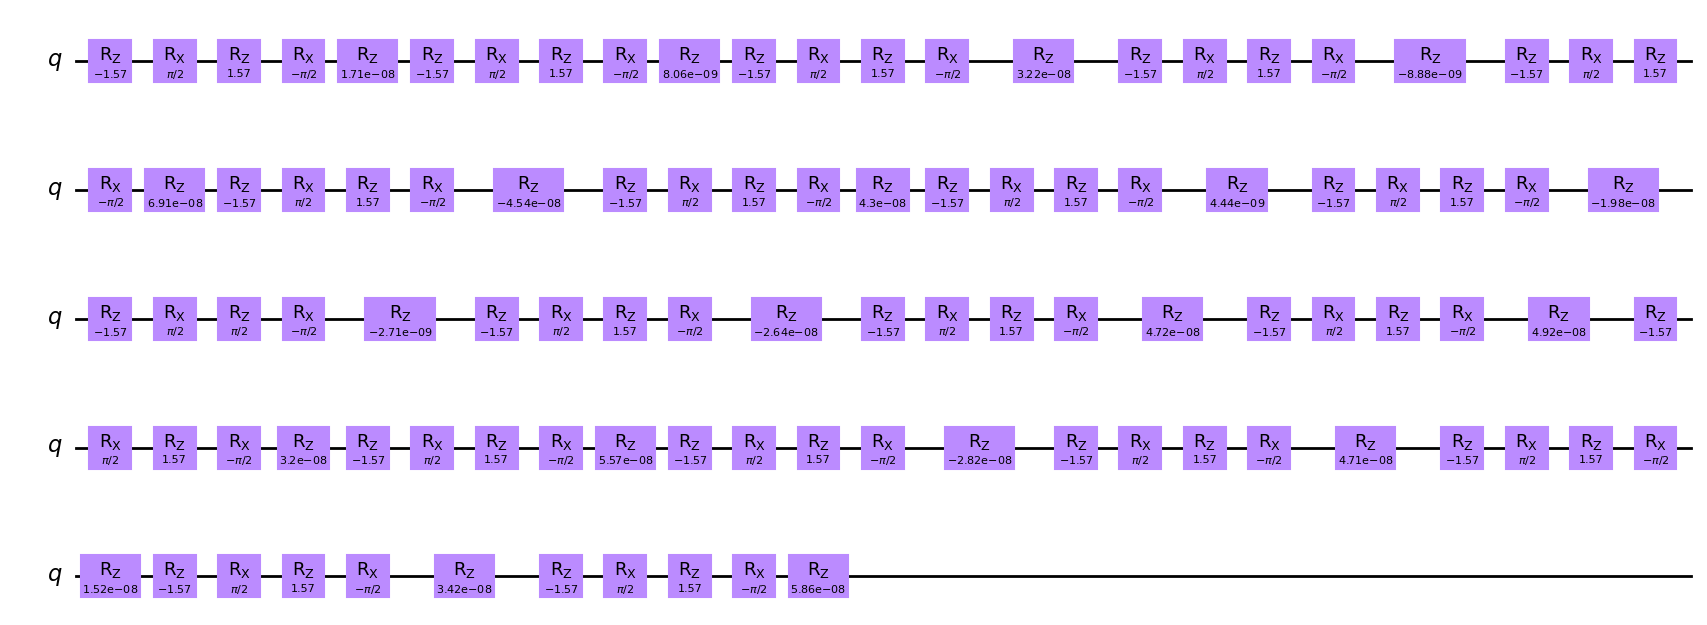

----------------------------------------------------------------------------------------
target operation:


<IPython.core.display.Latex object>

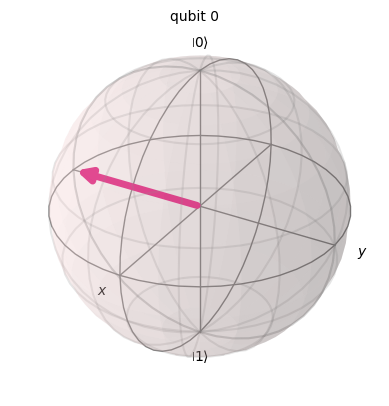

optimized operation:


<IPython.core.display.Latex object>

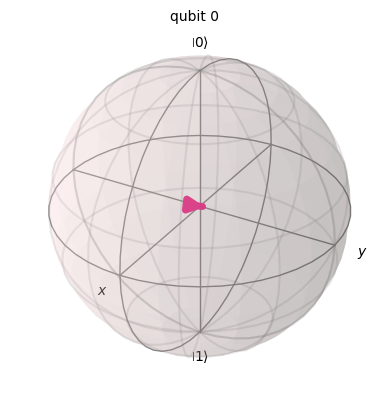

----------------------------------------------------------------------------------------
purity of  of optimized operation: 0.5010223388671884
state fidelity: 0.47851562500000117
cost: 0.5214843749999989


0.5214843749999989

In [10]:
target_operation_params = []
for i in range(num_gates_to_optimize):
    target_operation_params.append(-1/2)
    target_operation_params.append(1/2)
    target_operation_params.append(0)


cost_func3(result.x,target_operation_params,[],unm.noise_model,debug=True)